In [1]:
#importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Wrangling

In [3]:
data_path = (r'C:\Users\USER\Desktop\Yamok\Personal-repo\Data\student_data.csv')
data = pd.read_csv(data_path)

In [4]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [5]:
# Checking for the number of rows and columns present

In [6]:
data.shape

(395, 33)

In [7]:
# Checking for missing values. There's none in this dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
# Drop columns not being used

In [10]:
to_drop = ['address', 'Pstatus','reason',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc']
data.drop(to_drop, axis=1, inplace=True)

In [11]:
data.columns

Index(['school', 'sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [12]:
g_average = (data.G1 + data.G2 + data.G3)/3
data['G_mean']=g_average
data.head()

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,G_mean
0,GP,F,18,GT3,4,4,at_home,teacher,mother,2,2,3,6,5,6,6,5.666667
1,GP,F,17,GT3,1,1,at_home,other,father,1,2,3,4,5,5,6,5.333333
2,GP,F,15,LE3,1,1,at_home,other,mother,1,2,3,10,7,8,10,8.333333
3,GP,F,15,GT3,4,2,health,services,mother,1,3,5,2,15,14,15,14.666667
4,GP,F,16,GT3,3,3,other,other,father,1,2,5,4,6,10,10,8.666667


### Exploratory Data Analysis

In [13]:
data['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

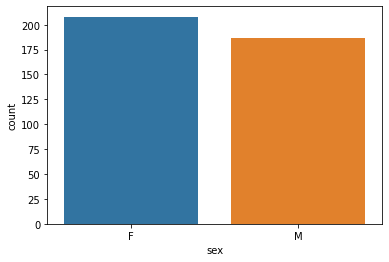

In [14]:
sns.countplot(x='sex', data=data);

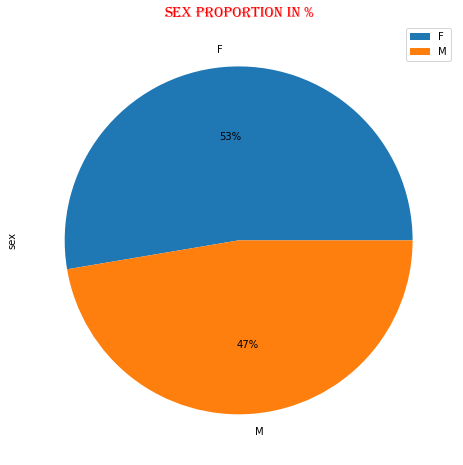

In [15]:
plt.figure(figsize=(10,8))
data['sex'].value_counts().plot(kind='pie', autopct='%2.f%%')
plt.title('Sex proportion in %', fontdict = {'fontname':'Algerian',
                                          'fontsize':15,
                                          'color':'red'})
plt.legend()
plt.show()

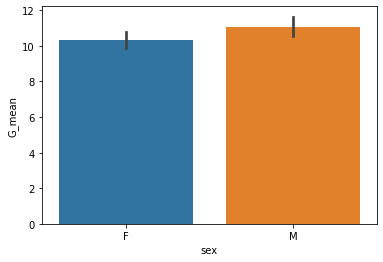

In [16]:
sns.barplot(x=data.sex, y=data['G_mean'], data=data);

We have more of females in the school compared to male. However, there is no significant difference.
The sex do not have a significant effect on the grade of students.

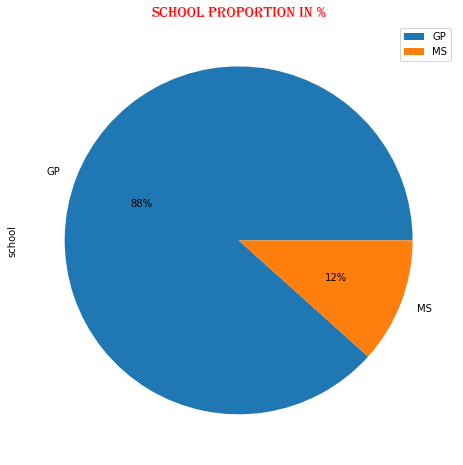

In [17]:
plt.figure(figsize=(10,8))
data['school'].value_counts().plot(kind='pie', autopct='%2.f%%')
plt.title('School proportion in %', fontdict = {'fontname':'Algerian',
                                          'fontsize':15,
                                          'color':'red'})
plt.legend()
plt.show()

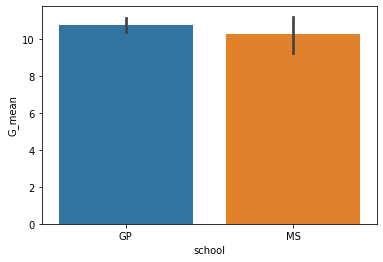

In [18]:
sns.barplot(x=data['school'], y=data['G_mean'], data=data);

Most students (88%) are from GP. While the other 12% are students of MS. The school attended do not cause a significance difference in the score of students

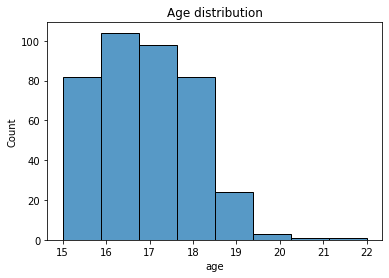

In [19]:
sns.histplot(data = data, x = data.age, bins=8);
plt.title('Age distribution')
plt.show()

We have many young students (<20years), while few are relatively old

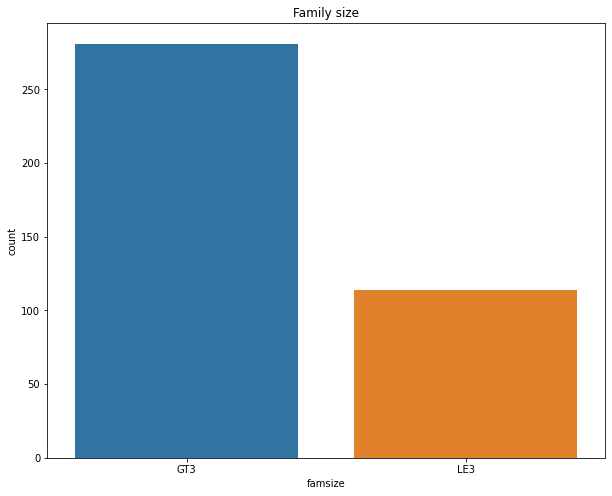

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='famsize', data=data);
plt.title('Family size')
plt.show()

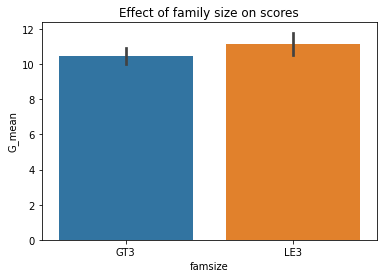

In [21]:
sns.barplot(x=data['famsize'], y=data['G_mean'], data=data);
plt.title('Effect of family size on scores')
plt.show()

GT3=Greater than 3
LE3=Less than or equal to 3.
More of the students comes from a family with size greater than 3.
Family size do not affect a student's score

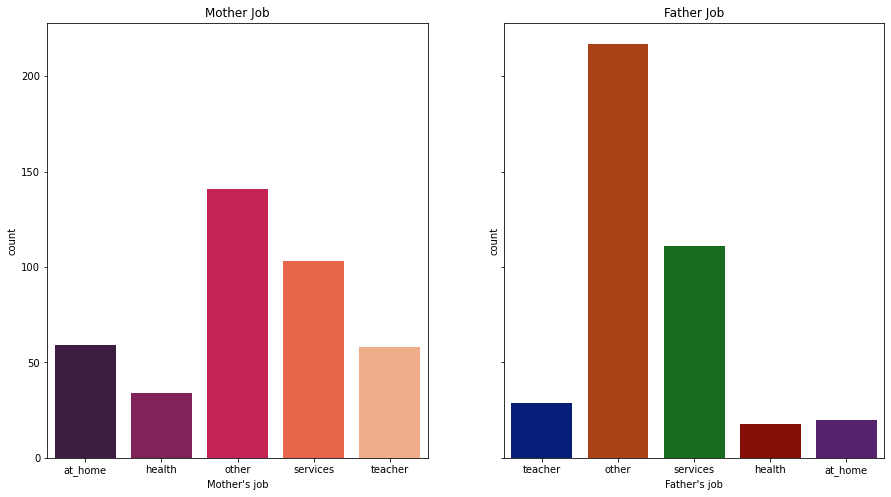

In [22]:
f, axes = plt.subplots(1,2, figsize=(15,8), sharey=True)

order_1 = ['at home', 'teacher', 'health', 'services', 'other']
sns.countplot(ax=axes[0], x='Mjob', data=data, palette='rocket', saturation=0.9)
axes[0].set_title('Mother Job')
axes[0].set_xlabel('Mother\'s job')
sns.countplot(ax=axes[1], x='Fjob', data=data, palette='dark', saturation=0.9)
axes[1].set_title('Father Job')
axes[1].set_xlabel('Father\'s job')
plt.show()

Most students have either parents with 'other' job's title. Most students have fathers with other and services job title. While more of mothers are teachers and health practitioners. We have more of either parents who stay at home compared to those who work in health industries

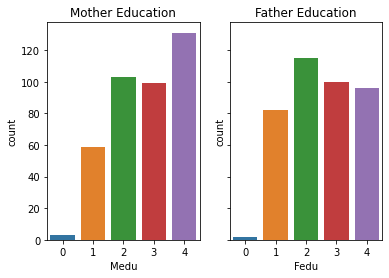

In [23]:
f, axes=plt.subplots(1,2, sharey=True)
sns.countplot(ax=axes[0], x='Medu', data=data);
axes[0].set_title('Mother Education')
sns.countplot(ax=axes[1], x='Fedu', data=data);
axes[1].set_title('Father Education')
plt.show()

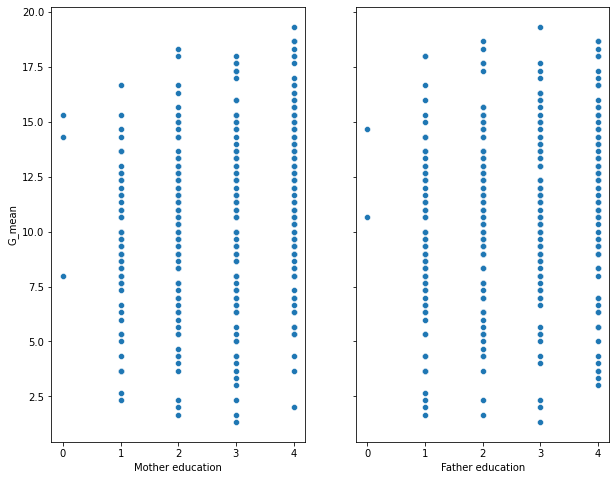

In [24]:
f, axes = plt.subplots(1,2, figsize=(10,8), sharey=True)

sns.scatterplot(ax=axes[0], x=data.Medu, y=data['G_mean'], data=data);
axes[0].set_xlabel('Mother education')
sns.scatterplot(ax=axes[1], x=data.Fedu, y=data['G_mean'], data=data);
axes[1].set_xlabel('Father education')

plt.show()